# PySAN Test Area

length: 20
alphabet: {1, 2, 3, 4}
sequence universe: 1,099,511,627,776
unique bigrams: [[1, 1], [1, 2], [2, 1], [2, 2], [2, 3], [3, 4], [4, 2], [1, 4], [4, 1], [3, 2]]
bigram universe: 16


<module 'matplotlib.pyplot' from '/home/ojs/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

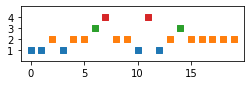

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../')

import pysan as ps

sequence = [1,1,2,1,2,2,3,4,2,2,1,4,1,2,3,2,2,2,2,2]

details = ps.describe(sequence)
ps.plot_sequence(sequence)

In [22]:
import pandas as pd
def get_transition_matrix(sequence, alphabet=None, verbose=False):
    """
    Computes a transition matrix for each bigram in a sequence.
    The resulting matrix can be interpreted by reading along the side first, then across the top, indicating from the element in down the side to the element along the top.
    For example, to find the number of transitions from element 2 to element 3, find element 2 down the side, then follow that row across until it reaches element 3 across the top.

    Examples
    ----------
    >>> sequence = ['cook','exercise','sleep','sleep','cook','exercise','sleep']
    >>> ps.get_transition_matrix(sequence)
        cook  exercise  sleep
    cook       0.0       0.0    1.0
    exercise   2.0       0.0    0.0
    sleep      0.0       1.0    1.0

    """
    if alphabet == None:
        alphabet = ps.get_alphabet(sequence)
    all_ngrams = ps.get_all_ngrams(sequence, 2)

    transition_matrix = np.zeros((len(alphabet), len(alphabet)))
    descriptive_matrix = [['-' for x in range(len(alphabet))] for y in range(len(alphabet))]

    for x, element_row in enumerate(alphabet):
        for y, element_column in enumerate(alphabet):
            current_ngram = [element_row, element_column]
            descriptive_matrix[x][y] = 'n' + str(current_ngram)
            #print('from', current_ngram[0], 'to', current_ngram[1], ':', all_ngrams.count(current_ngram))
            transition_matrix[x, y] = all_ngrams.count(current_ngram)

    if verbose:
        de_df = pd.DataFrame(descriptive_matrix, columns=alphabet, index=alphabet)
        print(de_df)
    tm_df = pd.DataFrame(transition_matrix, columns=alphabet, index=alphabet)
    return tm_df

sequence = ['A','A','B','A','A','C','C','C','A','B','A','A']
get_transition_matrix(sequence, alphabet=['A','B','C'])

,A,B,C
A,2.0,2.0,1.0
B,2.0,0.0,0.0
C,1.0,0.0,2.0
